# Natural Language Processing
**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way.

##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.15.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#  Dataset Preprocessing


In [9]:
df = pd.read_csv('function_assignment.csv', encoding='utf8')
df.head()

,function,job_title,jds
0,Sales/ Business Development/ Account Management,Head - Digital Portfolio,NaN
1,IT/ Information Technology,Software Head,10-15 years of experience in a VFX facility Ad...
2,Software Architecting,iPhone Developers,Candidate Should have Strong OO design and pro...
3,Software Architecting,Html/css Developer Job,Job Description Must have at -least . Years ex...
4,Software Architecting,Asp.net Developer Job,Develop ASP.netweb applicationsPerform unit te...


The decision to drop the 'function' column was made to focus solely on predicting job titles based on job descriptions, simplifying the task and reducing potential noise in the modeling process. This column was deemed irrelevant for the specific objective of the job title prediction task.








In [10]:
df = df.drop(['function'], axis=1)

In [14]:
import random
random_idx_list = [random.randint(1,len(df.jds)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,job_title,jds
5476,Clinical Trial Reporting/analysis,Requirement: We are looking for a candidate w...
9512,Sr Engineer/dy Manager Design,NaN
7466,Manager Logistics & Supply Chain,Planning routes and load scheduling for multi-...
9508,Manager -Material,Job description:- * Agency Development Â®istra...
5900,"Agm - Commerical & Contracts, Procurement - Ra...","BE/B.Tech Civil, 15-20 Years- Experience in Ha..."
8620,Dy.manager-cost Controlling,Ensure all the issues related to Import & Expo...
8659,Design Engineer/Manager,"1.Must have experience in process, design & pr..."
6761,Senior Flash Programmer (eLearning),Specification / Skills / Experience Understan...
9028,Franchisee Director - International,The Retail Chain currently has around 2000 Out...
5148,AVP - Networking,Network Infrastructure Management for large WA...


Found how many NaN values are there. So, there is NaN values only in jds. So, to be more precise I dropped those rows.

In [15]:
missing_jds = df['jds'].isnull().sum()
total_rows = df.shape[0]
# print(missing_jds)
# Calculate the percentage of missing values
percentage_missing = (missing_jds / total_rows) * 100

print("Percentage of missing values in 'jds' column:", percentage_missing)


Percentage of missing values in 'jds' column: 17.703302119270575


In [16]:
print("Number of rows before dropping missing values:", len(df))

# Drop rows with missing values in the 'jds' column
df.dropna(subset=['jds'], inplace=True)

# Confirm that missing values have been dropped
print("Number of rows after dropping missing values:", len(df))

Number of rows before dropping missing values: 10145
Number of rows after dropping missing values: 8349


The goal here is to standardise all characters to avoid case sensitive error. Some functions are case sensitive and a means to reduce the risk of error is to standardise all of the text to lower case. In this particular experiment, case is not meaningful to the model and it is therefore acceptable to apply lower case to all of the data.

In [17]:
df['jds'] = df['jds'].str.lower()
df.head(10)

,job_title,jds
1,Software Head,10-15 years of experience in a vfx facility ad...
2,iPhone Developers,candidate should have strong oo design and pro...
3,Html/css Developer Job,job description must have at -least . years ex...
4,Asp.net Developer Job,develop asp.netweb applicationsperform unit te...
6,AS\400 Professional,job description job holder may need to work o...
8,Inside Sales Account Manager - MNC,job description primary roe of inside sales a...
9,VFX Artist/ Designer,reporting to: design leader purpose: to conve...
10,Graphics Engineer,role : graphics software engineer education :...
13,UI Developer,job title: ui developer
14,Unity3D Developer - iOS/Android,looking for an unity3d developer who will be w...


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)



In [18]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [19]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [20]:
df.jds = df.jds.apply(lambda x: preprocess(x))

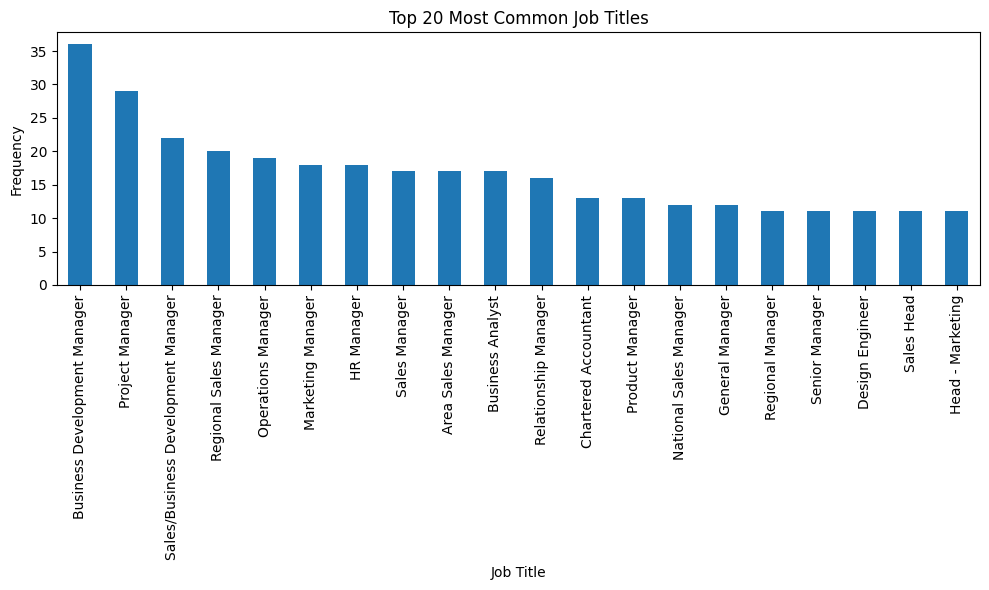

In [78]:
import matplotlib.pyplot as plt

# Aggregate the job titles and count their occurrences
job_title_counts = df['job_title'].value_counts()

# Select the top N most common job titles for better visualization
top_n = 20  # You can adjust this value as needed
top_job_title_counts = job_title_counts.head(top_n)

# Plot the distribution of top job titles
plt.figure(figsize=(10, 6))
top_job_title_counts.plot(kind='bar')
plt.title(f'Top {top_n} Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

These are top 20 jobs by frequency

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the job descriptions to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['jds'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_features.shape)


Shape of TF-IDF matrix: (8349, 1000)


The output (8349, 1000) indicates that the TF-IDF matrix has 8349 rows (samples) and 1000 columns (features).

Each row corresponds to a job description in the dataset.
Each column represents a unique word or token from the job descriptions, with a maximum of 1000 words due to the max_features parameter.
The values in the matrix represent the TF-IDF scores for each word in each job description.

## Train and Test Split

Here splitted the dataset

In [21]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [22]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=44) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 6679
Test Data size 1670


In [23]:
df['job_title'].nunique()

5976

In [24]:
train_data['job_title'].nunique()

5007

The above 2 values should be the same but due to very high variance of dataset they are not equal.

In [25]:
train_data.head(10)

,job_title,jds
4857,Counterparty Credit Risk Quant,maintenance enhancement model validation model...
4002,Data Warehouse,5 9 years experience relevant 3 5 yrs strong e...
6530,Mgr/ Sr Mgr - (Client Servicing) - A Leading E...,urgently looking mgr sr mgr client servicing l...
2904,Head - Corporate Centre,top management position incumbent expected pro...
8216,Linux Administrator,responsibility work linux administration lvm l...
8980,Head HR - Retail,required multi billion dollar retail group hr ...
1176,Window/ Wintel Administrator - L3 Support,1 5 8 yrs overall relevant experience windows ...
7952,Solution Manager - SMEAG,purpose job build maintain relationship promot...
5247,Sr Application Support Analyst - Linux/ Unix,responsibilities 1 ability understand producti...
9634,GM/ AVP - Accounts Receivables Reqd for Large ...,job role would involve handling accounts recei...


In [52]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.jds)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 18748


Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [27]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.jds),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.jds),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (6679, 30)
Testing X Shape: (1670, 30)


In [54]:
labels = train_data.job_title.unique().tolist()
# c = to_categorical(labels)

### Label Encoding
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit LabelEncoder on training data
encoder.fit(train_data.job_title.to_list())

# Transform training data
y_train = encoder.transform(train_data.job_title.to_list())
y_train = y_train.reshape(-1, 1)

# Transform test data and handle unseen labels
y_test = []
for label in test_data.job_title.to_list():
    try:
        encoded_label = encoder.transform([label])[0]
        y_test.append(encoded_label)
    except ValueError:
        # Handle unseen labels by assigning a default value or skipping the label
        # For example, you can assign a value of -1
        y_test.append(-1)

y_test = np.array(y_test).reshape(-1, 1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# encoder = LabelEncoder()
# encoder.fit(train_data.job_title.to_list())

# y_train = encoder.transform(train_data.job_title.to_list())
# y_test = encoder.transform(test_data.job_title.to_list())

# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

y_train shape: (6679, 1)
y_test shape: (1670, 1)


In [56]:
y_train

array([[1077],
       [1188],
       [3033],
       ...,
       [ 283],
       [4759],
       [2907]])

# Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

In [30]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-04-14 14:38:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-04-14 14:38:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-14 14:38:13--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [31]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10

In [57]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


We got 400000 word vectors

In [58]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [34]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors.

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [59]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [60]:
classes = df['job_title'].nunique()

In [61]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(classes, activation='softmax')(x)
model = tf.keras.Model(sequence_input, outputs)

Optimization Algorithm: The notebook utilizes the Adam optimization algorithm for gradient descent, known for its efficiency and adaptability to different types of data. Adam dynamically adjusts learning rates for each parameter, facilitating faster convergence and improved performance during training.

Callbacks: Two essential callbacks are employed during training:

LRScheduler: This callback dynamically adjusts the learning rate during training, helping to optimize convergence and achieve better results. Specifically, it exponentially decreases the learning rate after the initial epochs to fine-tune model performance.
ModelCheckpoint: The ModelCheckpoint callback saves the best-performing model based on specified metrics during training. In this notebook, it ensures that the model with the lowest validation loss is saved, enabling the retention of the most optimal model for further evaluation or deployment.
These succinct notes provide an overview of the key optimization techniques and callback functionalities utilized in the notebook.

In [62]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

In [63]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


In [64]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes = 5976)
y_test_cat = to_categorical(y_test, num_classes = 5976)

I have to make it forcefully 5976 just to run the model because there is lot of variance in this dataset.

In [65]:
print("Shape of y_train:", y_train_cat.shape)
print("Shape of y_test:", y_test_cat.shape)

Shape of y_train: (6679, 5976)
Shape of y_test: (1670, 5976)


In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           5624400   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 30, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

In [68]:
history = model.fit(x_train, y_train_cat, batch_size=BATCH_SIZE, epochs=19,
                    validation_data=(x_test, y_test_cat), callbacks=[ReduceLROnPlateau])

Epoch 1/19
105/105 [==============================] - 27s 256ms/step - loss: 0.7193 - accuracy: 0.7837 - val_loss: 18.9331 - val_accuracy: 0.2395 - lr: 0.0010
Epoch 2/19
105/105 [==============================] - 25s 243ms/step - loss: 0.7028 - accuracy: 0.7865 - val_loss: 18.8691 - val_accuracy: 0.2401 - lr: 0.0010
Epoch 3/19
105/105 [==============================] - 26s 245ms/step - loss: 0.6769 - accuracy: 0.7956 - val_loss: 19.2302 - val_accuracy: 0.2359 - lr: 0.0010
Epoch 4/19
105/105 [==============================] - 26s 247ms/step - loss: 0.6536 - accuracy: 0.8015 - val_loss: 19.3245 - val_accuracy: 0.2347 - lr: 0.0010
Epoch 5/19
105/105 [==============================] - 26s 251ms/step - loss: 0.6451 - accuracy: 0.8072 - val_loss: 19.4584 - val_accuracy: 0.2371 - lr: 0.0010
Epoch 6/19
105/105 [==============================] - 26s 250ms/step - loss: 0.6236 - accuracy: 0.8043 - val_loss: 19.0535 - val_accuracy: 0.2377 - lr: 0.0010
Epoch 7/19
105/105 [==========================

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

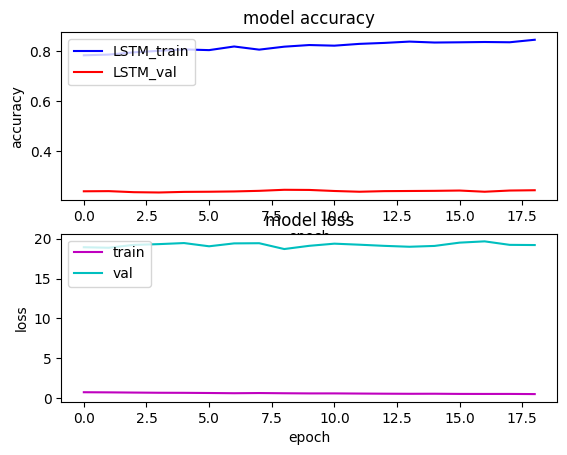

In [70]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

Here I created the model which can predict job_title by given job_description. But its accuracy is not that good because there lot of entries in dataset and those all are unique.

There is Future scope in this work as, We have to manipulate job_titles as such that they have very broad meaning.
Ex -> If there is 2 entries (Sr. Software Engineer) and (Software Engineer) then we can merge them and give the same job_title.
This will enhance accuracy and also reduce the variance of the dataset.